In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This code uses the google.colab library to connect to Google Drive. Using this code, you can access your Google Drive and manage the files and folders in it.


---



#Prepare Dataset

In [8]:
%%capture
!pip install ultralytics

⏸
`%%capture`: This command tells the code to save and not display the output of pip commands. This is used to avoid displaying more text in the output.

`!pip install ultralytics`: This command is used to install ultralytics package using pip software. The ultralytics package is a library for image detection and analysis. By installing this package, you will be able to use its functions and features in your project.


---



In [ ]:
%%capture
!pip install roboflow

⏸`!pip install roboflow`:By installing it, you can access the functions that you can work with roboflow. roboflow is an environment for preparing image datasets.


---



In [5]:
ROOT ='/content/gdrive/MyDrive/CarLiecence'

⏸Defines a path as the value of the ROOT variable. This is the path of the project folder


---



In [6]:
%cd {ROOT}

/content/gdrive/MyDrive/CarLiecence


⏸Changes the current directory to the path stored in the ROOT variable.


---



In [ ]:
!pwd

/content/gdrive/MyDrive/CarLiecence


⏸It shows the current directory


---



In [ ]:
API_KEY = "" #Secret

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("mahsa-sanaei-bq3ef").project("anpr_ir-eaypt")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.209, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to ANPR_ir-1 in yolov8:: 100%|██████████| 3490/3490 [00:22<00:00, 158.01it/s]


⏸``roboflow'' library is used to access the project and its data. In this code, first an instance of the ``Roboflow'' class is created, using your API key (`API_KEY'), it accesses the desired version and downloads the data.

The description of this section is as follows:

- `from roboflow import Roboflow': This command tells the code to load the ``Roboflow'' class from the ``roboflow'' library so that it can use it to access the project and its data.

- `rf = Roboflow(api_key=API_KEY)`: This line of code creates an instance of the `Roboflow` class using the API key (`API_KEY`). You must set the appropriate value for `API_KEY` in order to successfully access the API.

- `project = rf.workspace("mahsa-sanaei-bq3ef").project("anpr_ir-eaypt")`: This command tells the code to create a project named "anpr_ir-eaypt" in the workspace named access "mahsa-sanaei-bq3ef" and store it in the `project` variable.

- `dataset = project.version(1).download("yolov8")`: This command downloads the data of version 1 of the project named "yolov8" and stores it in the `dataset` variable.



---



#Model

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/data.yaml epochs=88 imgsz=640

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/data.yaml, epochs=88, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=

⏸ This command executes a YOLO task called "detect" with specified settings. The description of this command is as follows:

- `!yolo task=detect`: This part of the command tells the code to execute the "detect" operation. The "detect" function is used to detect objects in images.

- `mode=train`: This part of the command specifies that we are in training mode, which means that the YOLO algorithm will be applied to the data for learning and training.

- `model=yolov8s.pt`: This section specifies to use the YOLO model of type "yolov8s" with the extension ".pt". The file of this model has already been trained and we are going to transfer the training and train the data on it.

- `data=/content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/data.yaml`: This section specifies the path to the data YAML file. This YAML file contains information such as training and test data paths.

- `epochs=60`: This section specifies the number of epochs for training. The number of epochs indicates the number of times the YOLO algorithm will be trained on the data.

- `imgsz=640`: This section determines the size of the input images for training. Here, input images for YOLO8 should be set to 640x640 pixels.


---



In [ ]:
!yolo task=detect mode=val model=/content/gdrive/MyDrive/CarLiecence/runs/detect/train2/weights/best.pt  data=/content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/data.yaml

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/valid/labels.cache... 142 images, 0 backgrounds, 0 corrupt: 100% 142/142 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:06<00:00,  1.31it/s]
                   all        142        155      0.919      0.839      0.921      0.596
Speed: 4.2ms preprocess, 14.2ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


⏸ - `mode=val`: This section specifies that we are in the evaluation mode (validation), which means that the YOLO algorithm will be applied to the evaluation data and the performance of the model will be evaluated.

- `model=/content/gdrive/MyDrive/CarLiecence/runs/detect/train2/weights/best.pt`: This section specifies the YOLO model file path. The model file with the extension ".pt" is located in the specified path. When we train the model, it produces two files. One is the latest weights and the other is the best weights. We can choose any one as desired.


This model file is actually saved after our training in the path specified at the end of the process.


---



In [ ]:
!yolo task=detect mode=predict model=/content/gdrive/MyDrive/CarLiecence/runs/detect/train2/weights/best.pt  source=/content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/test/images

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/79 /content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/test/images/102_jpg.rf.b2a2a644465e11b546704a97a0e18129.jpg: 640x640 1 licence, 16.3ms
image 2/79 /content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/test/images/106_jpg.rf.209ad10b97a9c82f66e781c407def685.jpg: 640x640 1 licence, 16.9ms
image 3/79 /content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/test/images/115_jpg.rf.18d992234c710eda372d166b990e50a4.jpg: 640x640 1 licence, 18.1ms
image 4/79 /content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/test/images/121_jpg.rf.903ce03e5d32676b65470718cf69dfc9.jpg: 640x640 1 licence, 16.3ms
image 5/79 /content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/test/images/126_jpg.rf.7ef37a5f0e1b301d3ed120d1fdf25d38.jpg: 640x640 1 licence, 16.4ms
image 6/79 /content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/test/images/129_jpg.rf.75fb1d9eebadfb4994b407d4dd9b8b

⏸ A series of images are given for testing to make predictions


---



#Get Image

In [ ]:
!yolo predict model=/content/gdrive/MyDrive/CarLiecence/runs/detect/train2/weights/best.pt source='/content/images.jpeg'

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/images.jpeg: 448x640 1 licence, 105.1ms
Speed: 3.2ms preprocess, 105.1ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


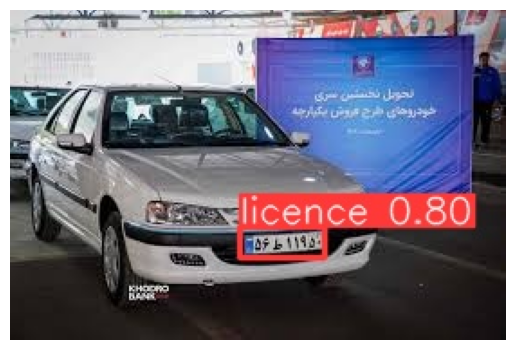

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/gdrive/MyDrive/CarLiecence/runs/detect/predict2/images.jpeg'


image = cv2.imread(image_path)


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
!yolo predict model=/content/gdrive/MyDrive/CarLiecence/runs/detect/train2/weights/best.pt source='/content/m2.jpeg'

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/m2.jpeg: 416x640 1 licence, 242.7ms
Speed: 14.7ms preprocess, 242.7ms inference, 59.4ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


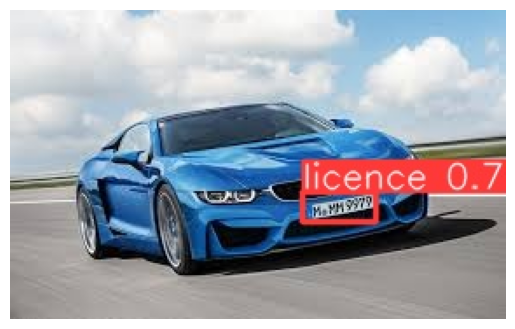

In [10]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/gdrive/MyDrive/CarLiecence/runs/detect/predict4/m2.jpeg'


image = cv2.imread(image_path)


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

#Repeat

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/data.yaml epochs=100 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 146MB/s]
Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/CarLiecence/ANPR_ir-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None

In [ ]:
!yolo predict model=/content/gdrive/MyDrive/CarLiecence/runs/detect/train3/weights/best.pt source='/content/images.jpeg'

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/images.jpeg: 448x640 1 licence, 161.6ms
Speed: 3.2ms preprocess, 161.6ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


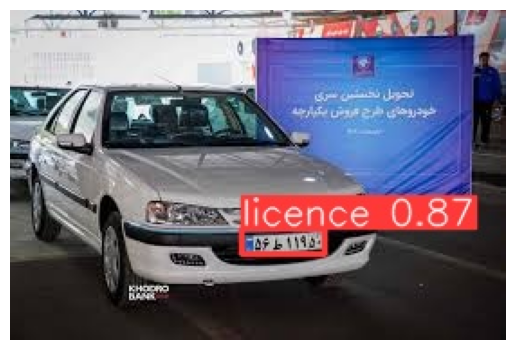

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/gdrive/MyDrive/CarLiecence/runs/detect/predict3/images.jpeg'


image = cv2.imread(image_path)


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()